# Spatial Filtering

Richell Flores

#Objectives

By the end of this notebook, students are expected to

- perform lowpass filtering
- perform highpass filtering

#Main references

https://pillow.readthedocs.io/en/stable/handbook/tutorial.html \\
https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html \\
Course notebook from Guadalupe, 2024 \\
http://www.canerozcan.net/files/CPE409/Part5.pdf \\
https://www.geeksforgeeks.org/python-opencv-filter2d-function/

# Required packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageFilter, ImageChops

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from ipywidgets import interact

In [ ]:
%matplotlib inline

# Smoothing (Lowpass) filters

## Test Image

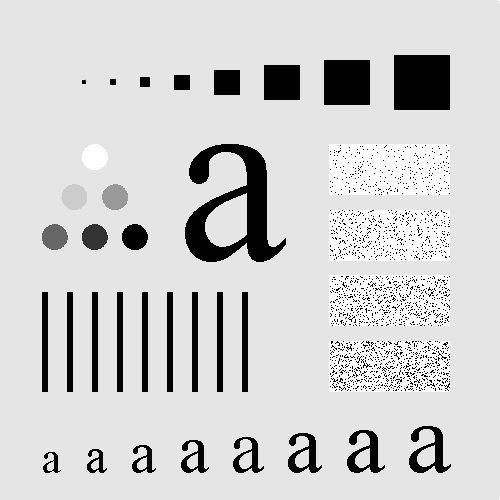

In [ ]:
tp = Image.open('/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/lowpass_testpattern.tif')

tp

In [ ]:
tp.size

(500, 500)

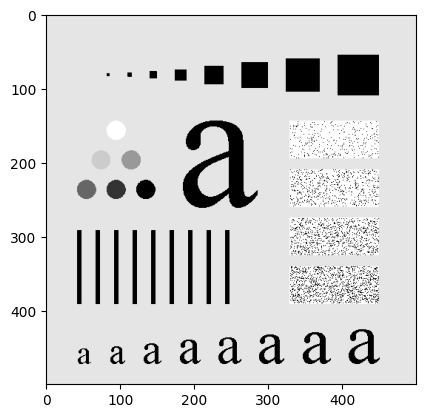

In [ ]:
tp_arr = np.asarray(tp)
plt.imshow(tp_arr, cmap='gray')

## Convolution and the Box filter

Before proceeding with doing the lowpass filtering or smoothing, we introduce first the syntax for convolution.

In [ ]:
from scipy.ndimage import convolve

In [ ]:
def box_kernel(s):
    return np.ones((s, s)) / (s * s)

In [ ]:
box_kernel(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

Syntax: `convolve(image, kernel, mode=['constant','reflect'])`

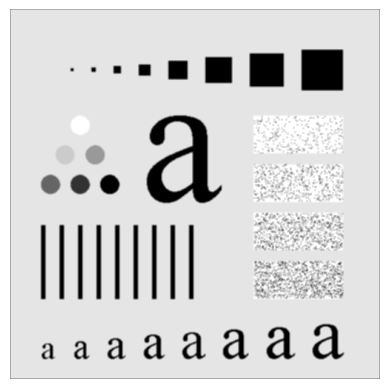

In [ ]:
g = convolve(tp_arr, box_kernel(3), mode='constant')
plt.axis('off')
plt.imshow(g, cmap='gray')

**Task**: Generate the results of lowpass filtering on `g` with box kernels of sizes $3 \times 3$, $11 \times 11$, and $21 \times 21$, first using zero (constant) padding and second using mirror (reflect) padding. You may use the `interact` decorator if you want.

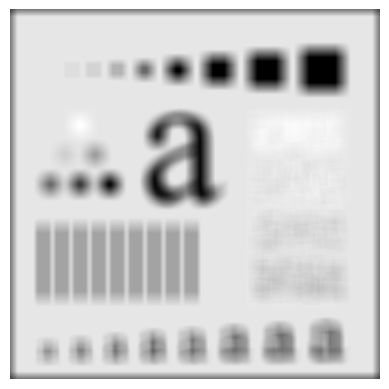

In [ ]:
# size 11 x 11
g2 = convolve(tp_arr, box_kernel(21), mode='constant')
plt.axis('off')
plt.imshow(g2, cmap='gray')


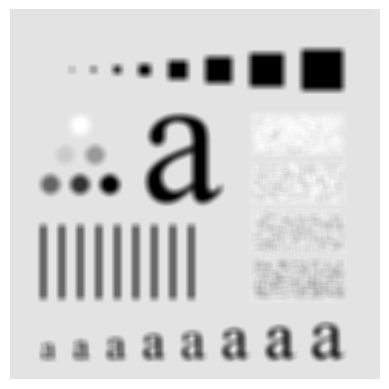

In [ ]:
# size 21 x 21
g3 = convolve(tp_arr, box_kernel(11), mode='reflect')
plt.axis('off')
plt.imshow(g3, cmap='gray')

**Questions:**
1. What are are your observations regarding:
    1. effect on the blurring?
    2. effect on the border?

2. Why do you think using a zero padding creates the borders you observed?

1. The higher the box filter the image becomes more blurred. <br>
When using the constant mode, zero padding, the border becomes more thicker as the kernel size increases. When using the mirror mode, there is no border on the edges of the image.
2. The zero padding added an extra row and column of ones on the edges of the image. The zero in hexadecimal is black.


Just like before, we can use Pillow functions to operate directly on the image.

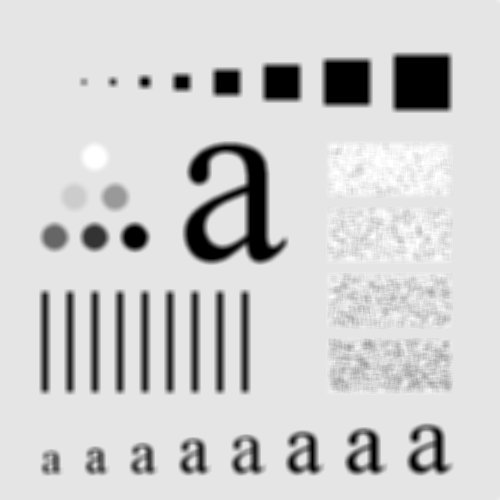

In [ ]:
tp_bb = tp.filter(ImageFilter.BoxBlur(3))
tp_bb

However, observe that the padding is a mirror padding. A separate method would be needed for a zero padding.

## The Gaussian filter

In [ ]:
def gaussian_kernel(m=3, K=1, sigma=1):
    assert m%2 == 1, 'kernel size m must be odd'
    idx = np.arange(-(m-1)/2, (m-1)/2 +1)
    s, t = np.meshgrid(idx, idx)
    G = K*np.exp(-(s**2+t**2)/(2*sigma**2))
    return G/np.sum(G) # normalize coefficients

In [ ]:
gaussian_kernel(m=5, K=1, sigma=1)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

For Gaussian filters, we use a filter of the size equal to the closest odd integer to $\lceil 6\sigma \rceil \times \lceil 6\sigma \rceil$.

**Task:** Compare the blurring effect to the test pattern (array) of a $3 \times 3$ box filter vs a $3 \times 3$ Gaussian filter with appropriate $\sigma$.

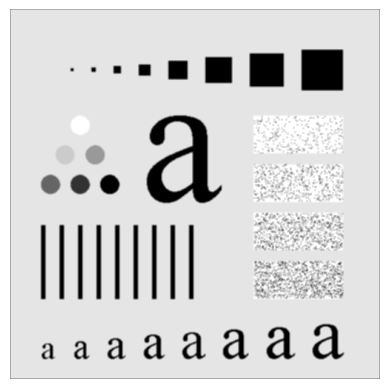

In [ ]:
# 3x3 Box Filter
g5 = convolve(tp_arr, box_kernel(3), mode='constant')
plt.axis('off')
plt.imshow(g5, cmap='gray')

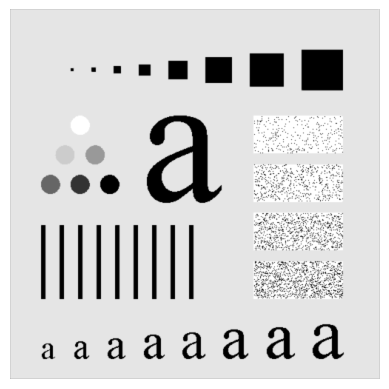

In [ ]:
# 3x3 Gaussian Filter
gkernel_4 = gaussian_kernel(m=3, K=1, sigma=0.5)

# ceiling_func(6sigma) = m

g4 = convolve(tp_arr, gkernel_4, mode='constant')
plt.axis('off')
plt.imshow(g4, cmap='gray')

**Task:** Compare the blurring effect to the test pattern (array) of a $43 \times 43$ Gaussian kernel with $\sigma = 7$ vs. a $63 \times 63$ Gaussian kernel with the same standard deviation.

array([[63, 70, 77, ..., 77, 70, 64],
       [70, 78, 85, ..., 85, 78, 70],
       [77, 85, 93, ..., 93, 85, 77],
       ...,
       [77, 85, 93, ..., 93, 85, 77],
       [70, 78, 85, ..., 85, 78, 70],
       [63, 70, 77, ..., 77, 70, 64]], dtype=uint8)
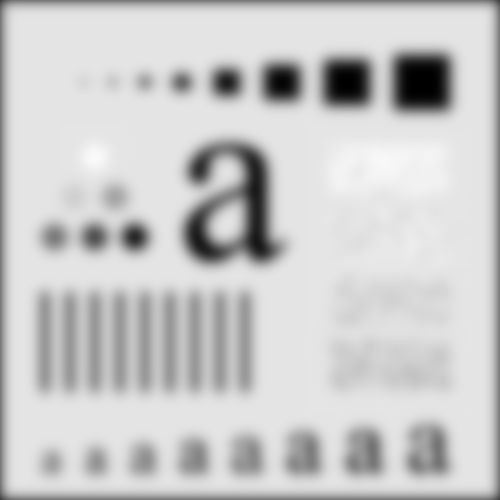

In [ ]:
# 43 x 43 gaussian kernel

g43 = convolve(tp_arr, gaussian_kernel(m=43, K=1, sigma=7), mode='constant')
g43

array([[63, 70, 77, ..., 77, 70, 64],
       [70, 78, 85, ..., 85, 78, 70],
       [77, 85, 93, ..., 93, 85, 77],
       ...,
       [77, 85, 93, ..., 93, 85, 77],
       [70, 78, 85, ..., 85, 78, 70],
       [63, 70, 77, ..., 77, 70, 64]], dtype=uint8)
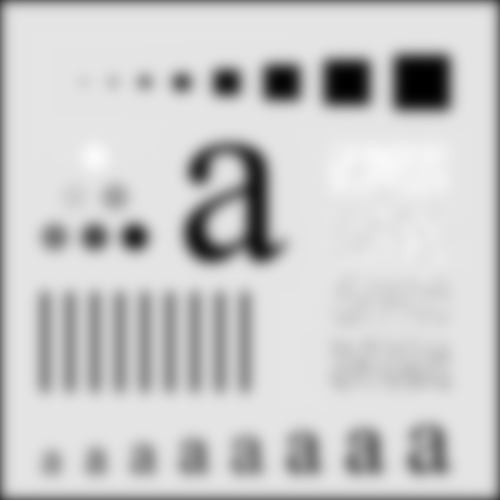

In [ ]:
# 63x63 gaussian kernel

g63 = convolve(tp_arr, gaussian_kernel(m=63, K=1, sigma=7), mode='constant')
g63

Both images had a negligible difference in blurring.



**Task:** Difference the two images from the previous task. Use thresholding to highlight parts of the image where the difference in intensity is at least 10. What do you observe?

interactive(children=(IntSlider(value=127, description='threshold', max=255), Output()), _dom_classes=('widget…

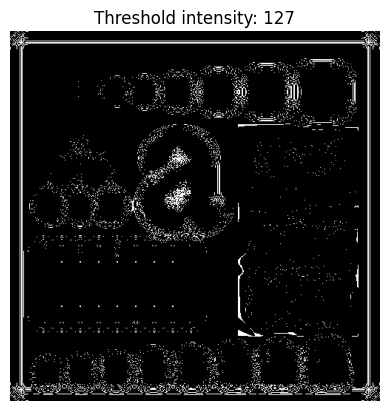

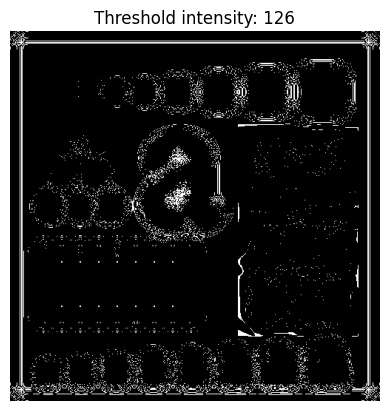

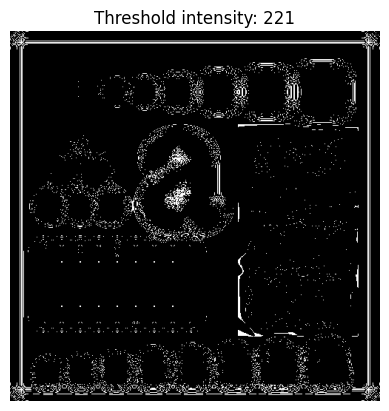

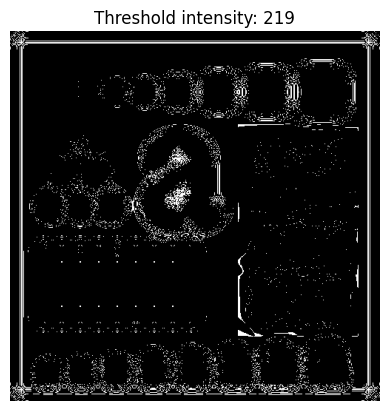

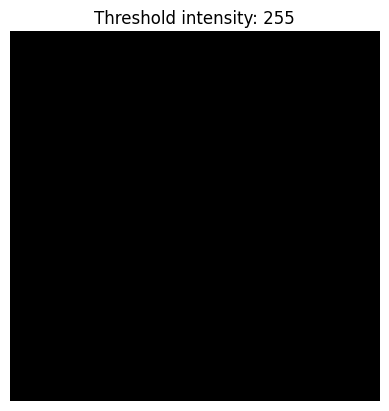

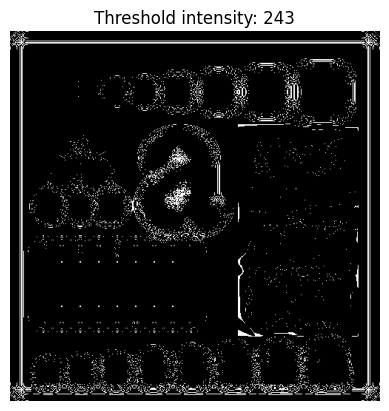

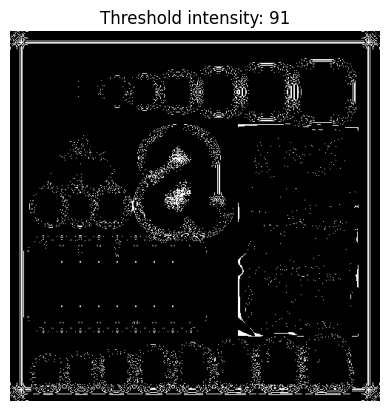

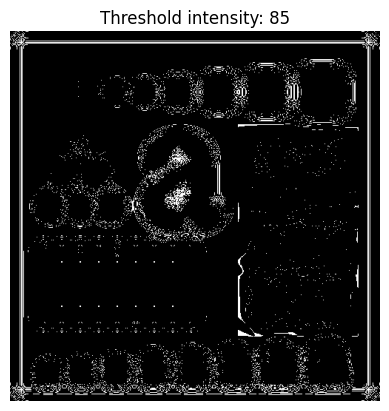

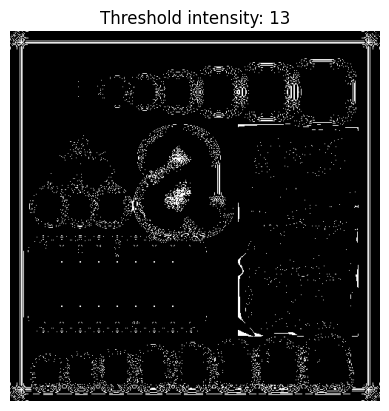

In [ ]:
differenced = g63 - g43

@interact(threshold=(0,255,1))
def threshold_transform(threshold=127):
    plt.title(f"Threshold intensity: {threshold}")
    plt.axis('off')
    plt.imshow(255 * (differenced > threshold), cmap='gray')

The images look the same even with different threshold values.


How can we use Pillow packages directly?

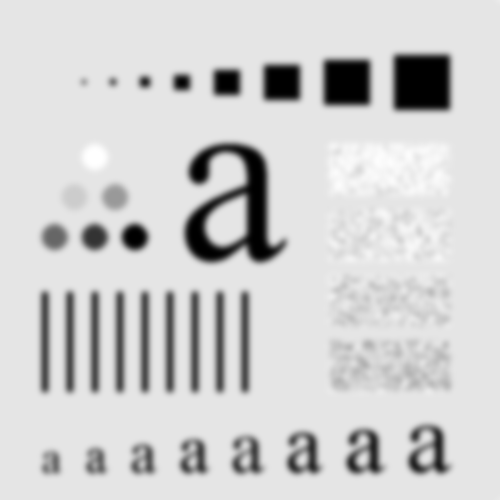

In [ ]:
tp_gb = tp.filter(ImageFilter.GaussianBlur(3))
tp_gb

## Exercise

Consider the following telescope image:

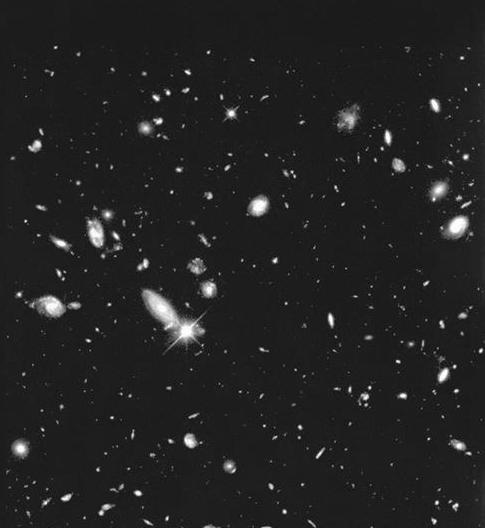

In [ ]:
telescope = Image.open('/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/hubble.tif')
telescope


Do lowpass filtering (Gaussian) and thresholding to highlight the star clusters.

interactive(children=(IntSlider(value=127, description='threshold', max=255), Output()), _dom_classes=('widget…

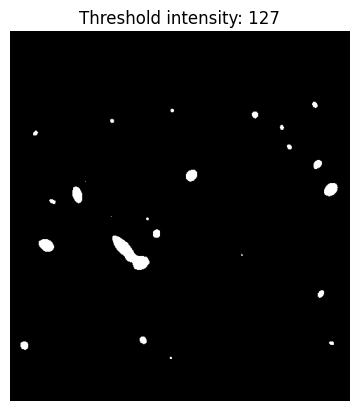

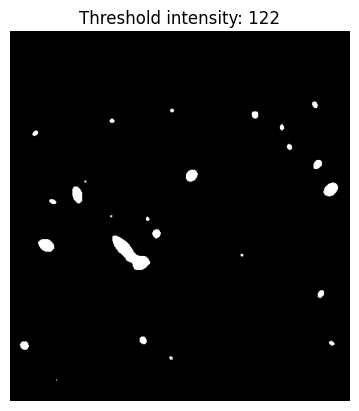

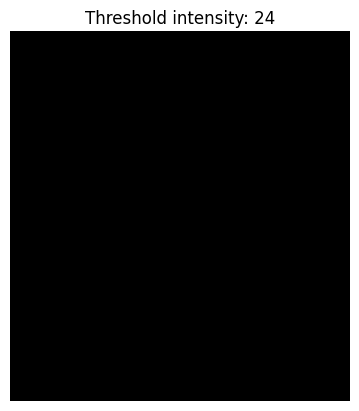

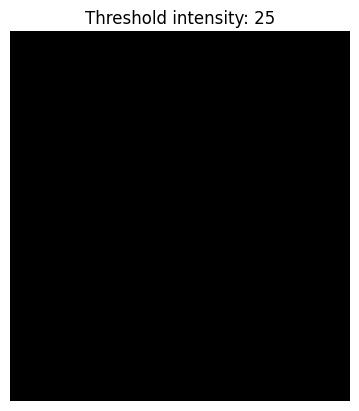

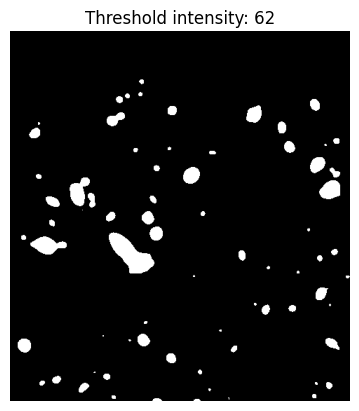

In [ ]:
telescope_gb = telescope.filter(ImageFilter.GaussianBlur(3))

tel_arr = np.asarray(telescope_gb)

@interact(threshold=(0,255,1))
def threshold_transform(threshold=127):
    plt.title(f"Threshold intensity: {threshold}")
    plt.axis('off')
    plt.imshow(255 * (tel_arr > threshold), cmap='gray')

## Median filter

Consider the following image with salt-and-pepper noise. For simplicity, we'll just use the function from the `ImageFilter` package.

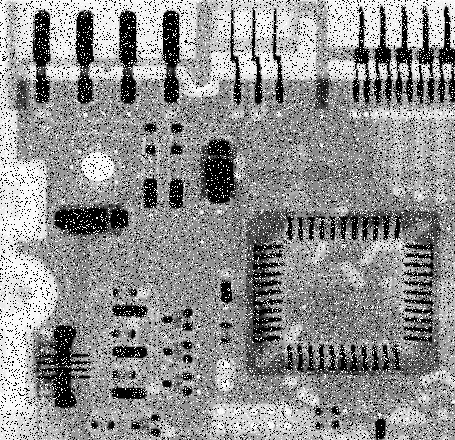

In [ ]:
board = Image.open('/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/board.tif')
board


**Task:** Perform Gaussian filtering on the image above.

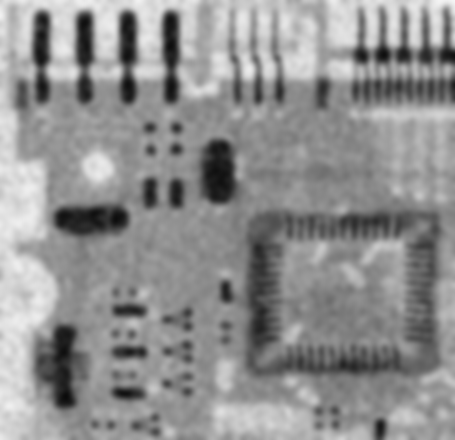

In [ ]:
board_gb = board.filter(ImageFilter.GaussianBlur(3))
board_gb

What do you observe about the image? Why do you think this was the result of this filter?

We introduce the median filter instead.

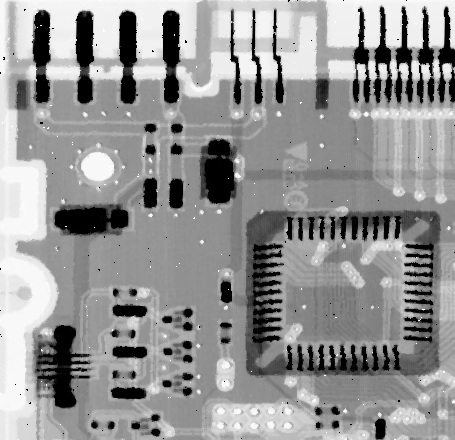

In [ ]:
board_median = board.filter(ImageFilter.MedianFilter(size=3))
display(board_median)

# Notes

Box Filter Kernels

the larger the kernel size -> the greater the burring <br>
constant padding -> darker border

Gaussian Kernels

Given (constant sigma) the greater the kernel size -> no change in blurring <br>
The greater the sigma -> the larger the kernel size -> the greater the blurring

# Sharpening (Highpass) filters

## The Laplacian filter

Consider the following image:

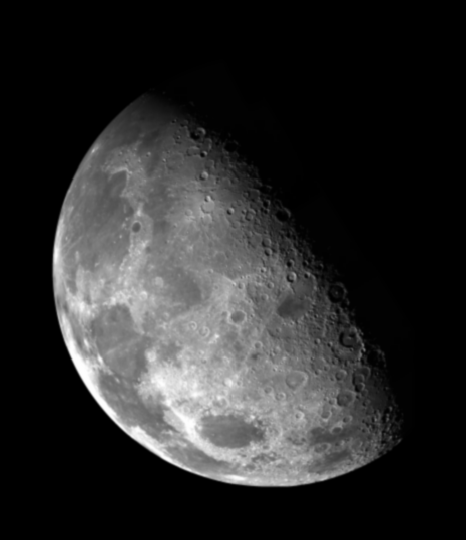

In [ ]:
moon = Image.open('/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/moon.tif')
moon

Let's define the Laplacian kernel (N4-type).

In [ ]:
kernel_lap4 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel_lap4

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

### Using Pillow functions

We can use native Pillow functions to implement the kernel.

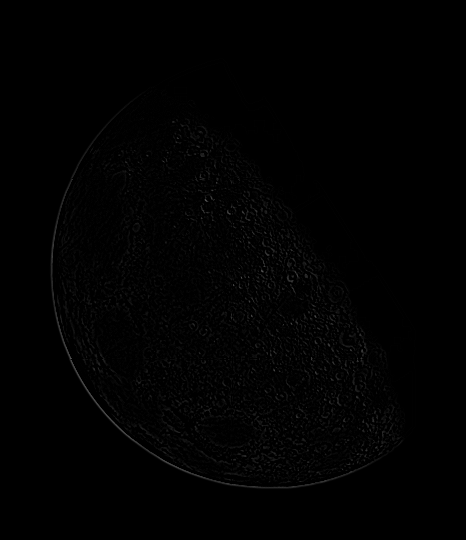

In [ ]:
# This is the Laplacian of the image.

lap4_filter = ImageFilter.Kernel(size=(3, 3), kernel=kernel_lap4.flatten(), scale=1, offset=0)
moon_lap4 = moon.filter(lap4_filter)
moon_lap4

To sharpen the image, we can subtract the Laplacian from the original image.

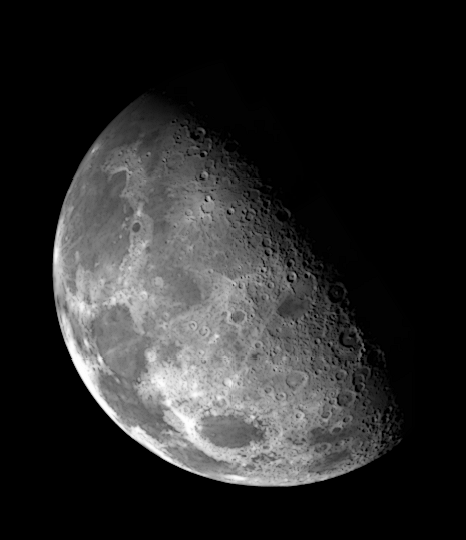

In [ ]:
moon_sharpened = ImageChops.subtract(moon, moon_lap4)
moon_sharpened

Let's look at the three images side-by-side

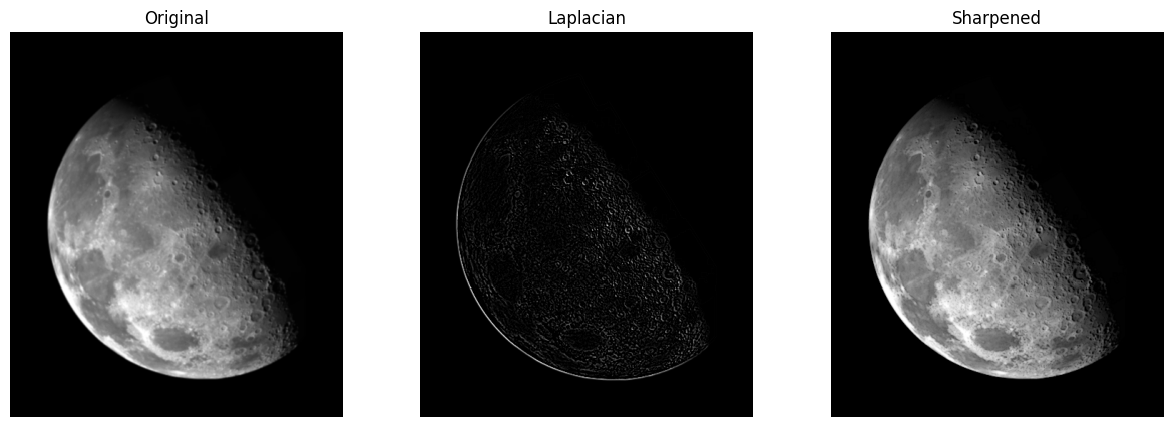

In [ ]:
# prompt: show moon, moon_lap4, and moon_sharpened side by side.

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(moon, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(moon_lap4, cmap='gray')
ax[1].set_title('Laplacian')
ax[1].axis('off')
ax[2].imshow(moon_sharpened, cmap='gray')
ax[2].set_title('Sharpened')
ax[2].axis('off')
plt.show()


You can also use `moon.filter(ImageFilter.FIND_EDGES)` to obtain the Laplacan and `moon.filter(ImageFilter.EDGE_ENHANCE_MORE)` to obtain the sharpened image.

**Task**: Go through the documentation of `ImageFilter` to obtain the Laplacian kernels implemented for both these filters.

### Using scipy `convolve`

First convert the image into an array. Take note of the data type. We convert it to `int32` to be able to handle large values especially once we do a convolution.

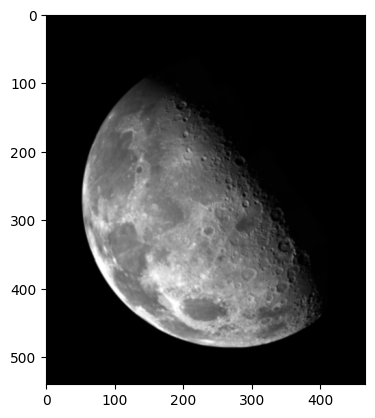

In [ ]:
moon_arr = np.asarray(moon, dtype='int32')
plt.imshow(moon_arr, cmap='gray')

To apply the Laplacian, we just convolve the image with the kernel.

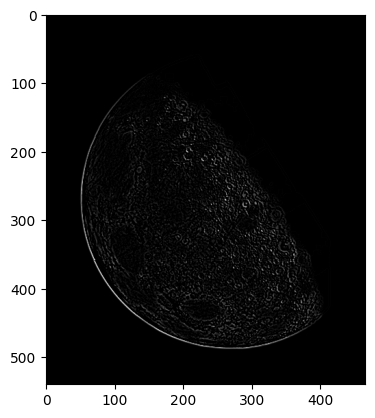

In [ ]:
moon_lap4_sc = convolve(moon_arr, kernel_lap4)
moon_lap4_sc = np.clip(moon_lap4_sc, 0, 255)
plt.imshow(moon_lap4_sc, cmap='gray')

Let's try again to subtract without using `ImageChops`

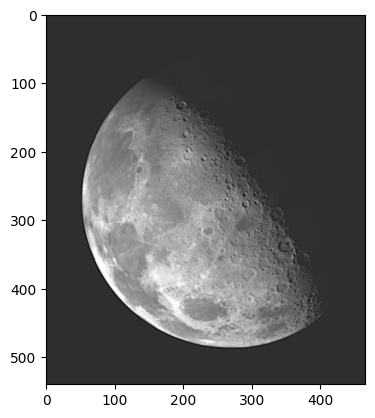

In [ ]:
moon_sharpened = plt.imshow(moon_arr-moon_lap4_sc, cmap='gray')

# the whole image became lighter

It's not that quite right, so we convert the Laplacian back to an image before subtracting it from the image. Notice how we convert back to `uint8` since this is the datatype of the pixel values commonly used in `Pillow`.

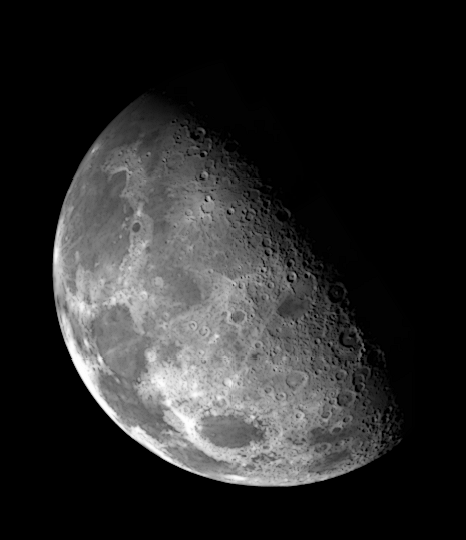

In [ ]:
moon_lap4_sc_img = Image.fromarray(moon_lap4_sc.astype('uint8'))
moon_sharpened = ImageChops.subtract(moon, moon_lap4_sc_img)
moon_sharpened
# moon_lap4_sc_img

**Task**: Define a kernel that will simultaneously sharpen and combine (subtract) the Laplacian to the original image.

*Hint*: Recall that the sharpened image $g$ is in the form $$g(x,y) = f(x,y) + c[\nabla^2f(x,y)]$$ where $c$ is dependent on the kernel used.

In [ ]:
Combined_laplacian = np.array([[0, -1, 0], [-1, 5, -1], [0,-1, 0]])
Combined_laplacian

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

## The Sobel operators

First-order derivatives (or the gradient) can be used to highlight small specs that may not be readily visible in a grayscale image. There are many implementations of the gradient, but for this class, we will be using the Sobel operators.

Let's define the Sobel kernels.

In [ ]:
sobelx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobely = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

Let's work on this contact lens image.

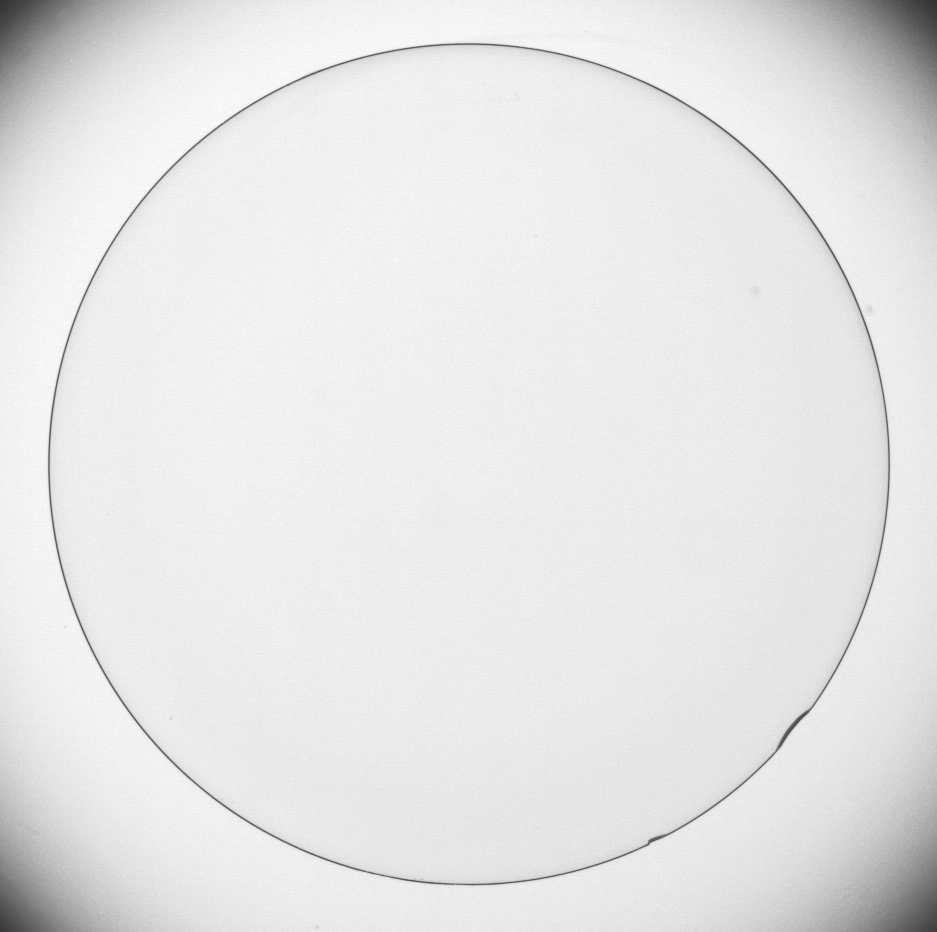

In [ ]:
contact_lens = Image.open('/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/contact_lens.tif')

contact_lens

In [ ]:
contact_lens_arr = np.asarray(contact_lens, dtype='int32')

**Task**: Convolve the image above with the Sobel filter in the $x$-direction.

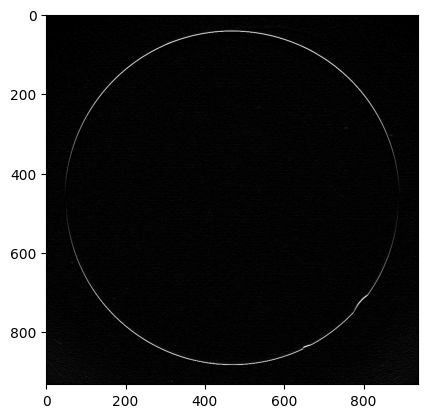

In [ ]:

cl_x = convolve(contact_lens_arr, sobelx)
cl_x = np.clip(cl_x, 0, 255)
plt.imshow(cl_x, cmap='gray')

**Task**: Convolve the image above with the Sobel filter in the $y$-direction.

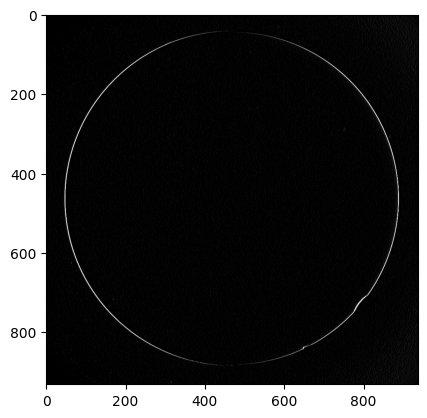

In [ ]:

cl_y = convolve(contact_lens_arr, sobely)
cl_y = np.clip(cl_y, 0, 255)
plt.imshow(cl_y, cmap='gray')

We can obtain the magnitude of the gradient by using `np.hypot`.

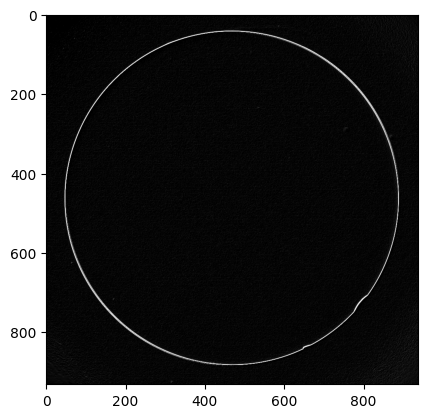

In [ ]:
mag = np.hypot(cl_x, cl_y)
mag = np.clip(mag, 0, 255)
plt.imshow(mag, cmap='gray')

# Exercises

## Unsharp masking and highboost filtering

We can "sharpen" an image by performing smoothing! Do the following steps and take note of your observations.

We will be working on the following image:

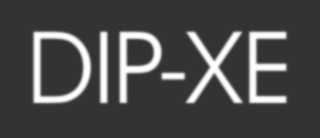

In [ ]:
dipxe = Image.open('/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/dipxe.tif')

dipxe

Blur the image using a $5 \times 5$ Gaussian filter.

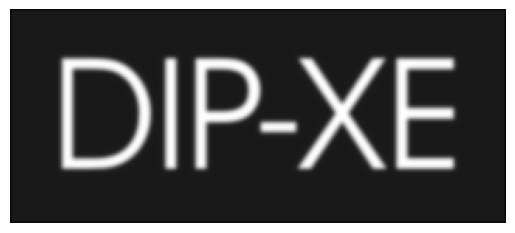

In [ ]:
# 5x5 Gaussian Filter
gkernel_5 = gaussian_kernel(m=5, K=1, sigma=0.8)

# ceil(6sigma) = 5

g5 = convolve(dipxe, gkernel_5, mode='constant')
plt.axis('off')
plt.imshow(g5, cmap='gray')

In [ ]:
type(g5)

numpy.ndarray

Let $f(x,y)$ be the original image and $\bar{f}(x,y)$ be the blurred image.

Obtain the mask, $g_{mask}(x,y)$ as follows: $$g_{mask}(x,y) = f(x,y) - \bar{f}(x,y).$$

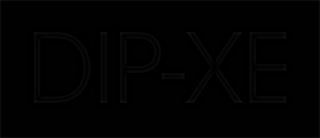

In [ ]:
g5_img = Image.fromarray(g5.astype('uint8'))
dipxe_mask = ImageChops.subtract(dipxe, g5_img)
dipxe_mask

We will add the mask back to the original image obtaining the edited image, $g$ as follows: $$g(x,y) = f(x,y) + kg_{mask}(x,y).$$

For now, use $k=1$. This is what we call unsharp masking.

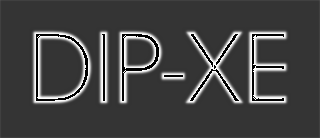

In [ ]:
# First transform to numpy arrays

dipxe_array = np.asarray(dipxe, dtype='uint8')
dipxe_mask_array = np.asarray(dipxe_mask, dtype = 'uint8')
k = 1
dipxe_edited = dipxe_array + k*dipxe_mask_array

edited_image = Image.fromarray(dipxe_edited.astype('uint8'))
edited_image

Now, if $k>1$, we call it highboost filtering. Experiment with values of $k$ to your liking.

## Enhancing a whole body bone scan

Now, let's combine everything we have learned so far. Do the following steps to enhance the following whole body bone scan.

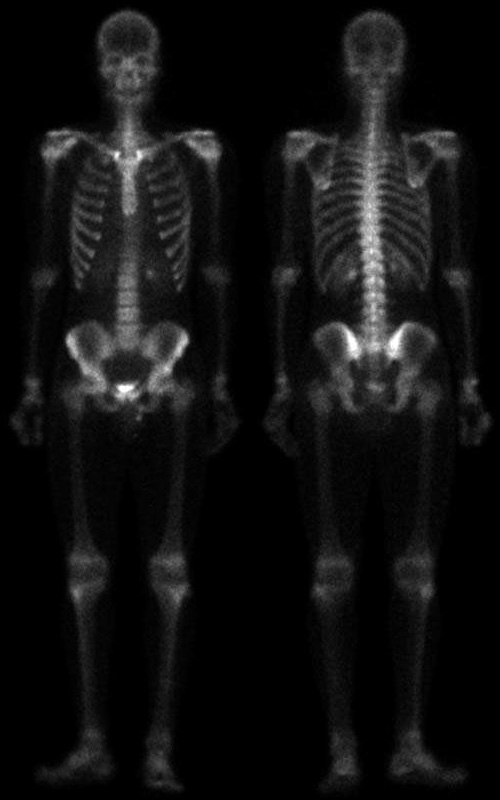

In [ ]:
skeleton = Image.open('/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/skeleton.tif')
skeleton

Sharpen the image using the following Laplacian kernel:

$$\begin{bmatrix}-1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1 \end{bmatrix}$$

Use the appropriate $c$ in combining the original image with the Laplacian.

Call the Laplacian `skeleton_lap` and the sharpened image `skeleton_sharp`.

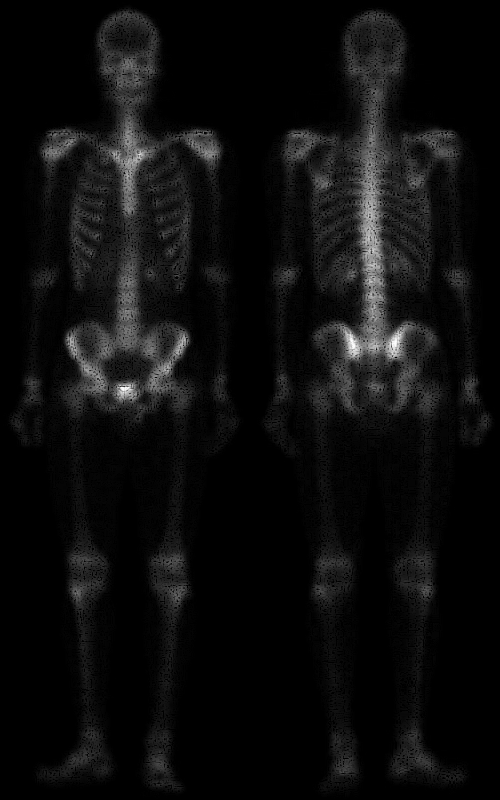

In [ ]:
skeleton_kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

skeleton_filter = ImageFilter.Kernel(size=(3, 3), kernel=skeleton_kernel.flatten(), scale=1, offset=0)
skeleton_lap8 = skeleton.filter(skeleton_filter)

skeleton_sharp = ImageChops.subtract(skeleton, skeleton_lap8)

skeleton_sharp



Obtain the Sobel gradient of `skeleton_sharp`. Call this image `skeleton_sob`

In [ ]:
def box_kernel(s):
    return np.ones((s, s)) / (s * s)

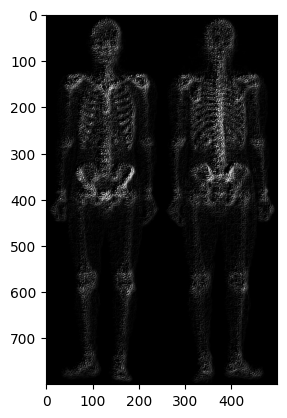

In [ ]:
sobelx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobely = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

skeleton_arr = np.asarray(skeleton_sharp, dtype='int32')
cl_x = convolve(skeleton_arr, sobelx)
cl_x = np.clip(cl_x, 0, 255)
cl_y = convolve(skeleton_arr, sobely)
cl_y = np.clip(cl_y, 0, 255)
skeleton_sob = np.hypot(cl_x, cl_y)
skeleton_sob = np.clip(skeleton_sob, 0, 255)
plt.imshow(skeleton_sob, cmap='gray')

Now apply a $5\times 5$ box filter on `skeleton_sob`. Call this image `skeleton_box`.

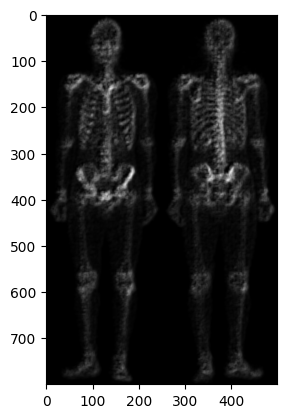

In [ ]:
skeleton_box = convolve(skeleton_sob, box_kernel(5), mode='constant')
plt.imshow(skeleton_box, cmap='gray')

Multiply `skeleton_lap` with `skeleton_sob` to create a mask. Call this `skeleton_mask`.

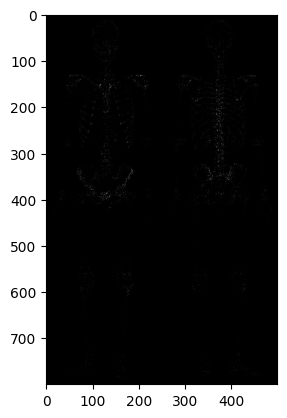

In [ ]:
skeleton_mask = skeleton_lap8 * skeleton_sob
plt.imshow(skeleton_mask, cmap = 'gray')

Add the original image and `skeleton_mask`. Afterwards, apply a power-law transform, experimenting on appropriate values of $\gamma$. See if you can make the outline of the person appear as well.

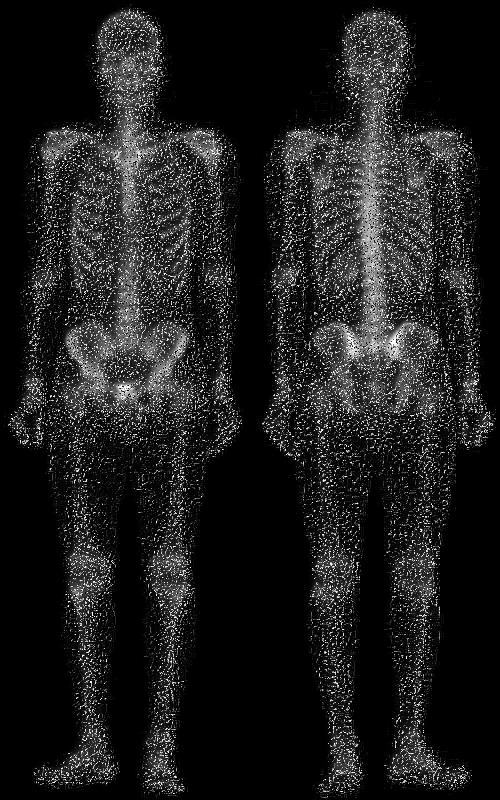

In [ ]:
edited_image = skeleton + skeleton_mask
skeleton_edited = Image.fromarray(edited_image.astype('uint8'))
skeleton_edited

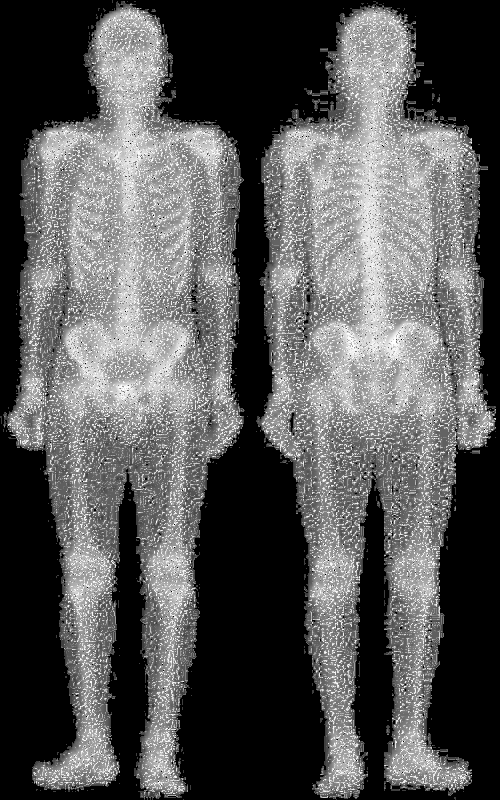

In [ ]:
c = 1
gamma = 0.25
R_image = skeleton_edited.point(lambda p: int(c * (p/255) ** gamma * 255))
R_image